# Introduction to Linear Regression

In [1]:
# training a linear_model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
# training the model with matrices
my_model=reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
# y intercept where the regression line
# meets the dependent variable's axis (y-axis)
my_model.intercept_
# this gives the slope of the regression line
my_model.coef_

array([0.5, 0.5])

# Working with a dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importing the csv file into a dataframe
data='file:///C:/Users/Ariel/AppData/Local/Temp/imports-85.data'
df=pd.read_csv(data,header=None)
# reading the first five rows of the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# reading the bottom five rows of the dataframe
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
# a list of headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
# inserting column headers in the dataframe
df.columns=headers

In [7]:
# specifying the number of rows to consider (can also be done for the tail)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [8]:
# replacing the ? with NaN
df.replace('?',np.NaN, inplace=True)

In [9]:
df[['highway-mpg']].head()

,highway-mpg
0,27
1,27
2,26
3,30
4,22


In [10]:
df[['price']].head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


# Linear Regression with the DataFrame

Single variables used

In [61]:
# we'll work with the  column and the price column
# Highway will be the independant variable and price the dependent variable
# replace the NaN values with the mean of the column
mean_highway=df['highway-mpg'].astype(float).mean()
df['highway-mpg'].replace(np.nan,mean_highway,inplace=True)
mean_price=df['price'].astype(float).mean()
df['price'].replace(np.nan,mean_price,inplace=True)
X=df[['highway-mpg']]
Y=df[['price']]

In [24]:
from sklearn.linear_model import LinearRegression
# Creating the linear regression object
Lregress=LinearRegression()
# Training/fit the linear model
My_model=Lregress.fit(X,Y)
# intercept
My_model.intercept_

array([37470.66014138])

In [25]:
# coefficient
My_model.coef_

array([[-789.02661986]])

# The linear equation of the model
$Y=(-789.027X) +37470.660$

In [26]:
# Making price predictions based on the model
Yhat=My_model.predict(X)

In [27]:
Yhat[0:5]

array([[16166.94140528],
       [16166.94140528],
       [16955.96802513],
       [13799.86154571],
       [20112.07450456]])

In [28]:
df['highway-mpg']=df['highway-mpg'].astype(float)
df['price']=df['price'].astype(float)

(0.0, 48128.35752371563)

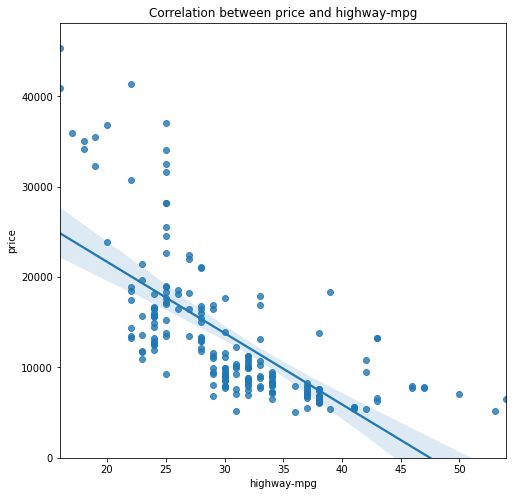

In [30]:
# a visualization of the above regression line
%matplotlib inline
import seaborn as sns
width = 8
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.title('Correlation between price and highway-mpg')
plt.ylim(0,)

There is a negative correlation between price and highway-mpg.

It reflects well on our linear model.

As can be seen, there are residuals.

The residuals gives us an idea of the variance herein.

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e)
Basically:
e=Yhat-y

Residual plot(residuals on the y-axis and independent variable on the x-axis)

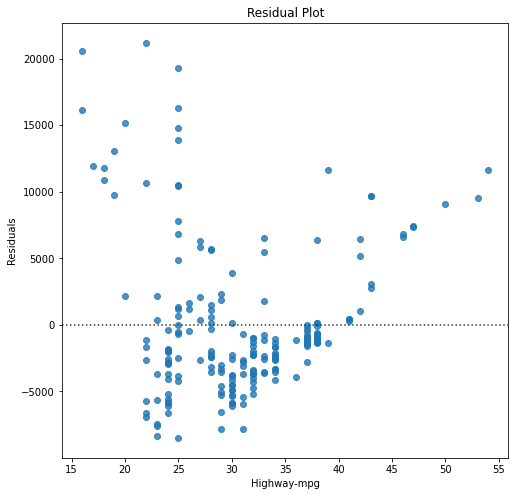

In [31]:
width = 8
height = 8
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Highway-mpg')
plt.show()

As per the above residual plot, a nonlinear plot would be more appropriate for the data we are working with.

Multiple Linear Regression

In [32]:
norm_mean=df['normalized-losses'].astype(float).mean()
df['normalized-losses'].replace(np.nan,norm_mean,inplace=True)

In [33]:
# Multivariate independent variables
from sklearn.linear_model import LinearRegression
lm2=LinearRegression()
X1=df['normalized-losses']
X0=df['highway-mpg']
X_M=df[['normalized-losses','highway-mpg']]
Y_M=df['price']
A_model=lm2.fit(X_M,Y_M)

In [34]:
# predictions by our model
Yhat=A_model.predict(X_M)
A_model.coef_

array([   2.80446901, -786.7272266 ])

In [35]:
A_model.intercept_

37057.80577561143

Yhat=2.8045X0-786.727X0X1+37057.806

In [36]:
Yhat[0:5]

array([16158.31587644, 16158.31587644, 16945.04310305, 13915.92189502,
       20209.73970785])

C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


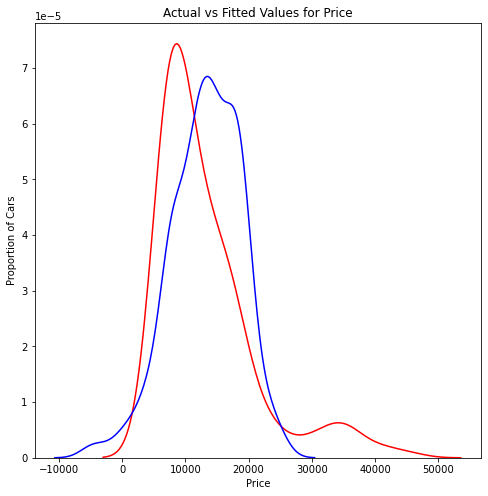

In [37]:
# visualization of the multivariate 
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit.

# Polynomial Regression and Pipelines

A class of linear regression and multiple linear regression

We get non-linear relationships
by squaring or setting higher-order
terms of the predictor variables.

Let's fit the polynomial using the function polyfit,

then use the function poly1d to display the polynomial function

In [38]:
# Here we use a polynomial of the 3rd order (cubic)
X=df['highway-mpg']
Y=df['price']
f=np.polyfit(X,Y,3) #3 is the order of the polynomial
d=np.poly1d(f)
print(d

        3         2
-1.641 x + 213.4 x - 9226 x + 1.402e+05


We use the following function to polynomial plot



In [39]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

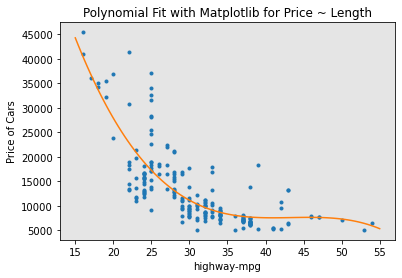

In [40]:
PlotPolly(d,X,Y,'highway-mpg')

Clearly, the polynomial fit is 

a better fit than the former linear model.

For this particular data points.

In [41]:
Y_hat=np.polyfit(X,Y,3)

In [42]:
Y_hat

array([-1.64053866e+00,  2.13411821e+02, -9.22561090e+03,  1.40157828e+05])

# Multivariate Polynomial function

Performing a polynomial transform on multiple features

In [43]:
Multivariate= df[['horsepower', 'curb-weight', 'engine-size']]
item_mean=Multivariate['horsepower'].astype(float).mean()
Multivariate['horsepower'].replace(np.nan,item_mean,inplace=True)
item_mean=Multivariate['curb-weight'].astype(float).mean()
Multivariate['curb-weight'].replace(np.nan,item_mean,inplace=True)
item_mean=Multivariate['engine-size'].astype(float).mean()
Multivariate['engine-size'].replace(np.nan,item_mean,inplace=True)

C:\Users\Ariel\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
#create a PolynomialFeatures object of degree 3
pr=PolynomialFeatures(degree=3)
pr

PolynomialFeatures(degree=3)

In [46]:
Multivariate_pr=pr.fit_transform(Multivariate)

In [47]:
# Let us look at the numbers of rows and columns before transformation

Multivariate.shape

(205, 3)

In [48]:
# Let us look at the numbers of rows and columns after transformation

Multivariate_pr.shape

(205, 20)

# Pipeline

In [49]:
# Pipelines fasten the preprocessing process
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Create the pipeline by creating a list of tuples

including the name of the model or estimator 

and its corresponding constructor

In [50]:
Input=[('Scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [51]:
# inputting the above list into the pipeline constructor
Pipe=Pipeline(Input)
Pipe

Pipeline(steps=[('Scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
Multivariate=Multivariate.astype(float)
df['price']=df['price'].astype(float)

In [53]:
Pipe_model=Pipe.fit(Multivariate,df['price'])

In [54]:
YPipe=Pipe_model.predict(Multivariate)

In [55]:
YPipe[0:10]

array([13500.41909225, 13500.41909225, 17877.89018895, 11309.40636141,
       14814.13701472, 13871.884648  , 14653.21969896, 15274.15977358,
       16548.69471695, 16665.83845325])

# In-Sample Evaluation

In [58]:
from sklearn.metrics import mean_squared_error

Simple Linear Model

R-Squared

Also known as the coefficient of determination.

Explains percentage of variation of the target variable

explained by the regression line

In [62]:
X=df[['highway-mpg']]
Y=df[['price']]
My_model.score(X,Y)

0.47682578947968446

Mean_Squared_error

Square of the difference between actual value (y) and the estimated value (ŷ).

In [64]:
Y_H=My_model.predict(X)

In [68]:
mse=mean_squared_error(Y,Y_H)
print(f'mean_squared_error:{mse}')

mean_squared_error:32235628.289382134


Multiple Linear Regression

In [72]:
X_M=df[['normalized-losses','highway-mpg']]
Y=df[['price']]
R2=A_model.score(X_M,Y)
print(f'R-squared: {R2}')

R-squared: 0.476949232798062


In [74]:
Yd=A_model.predict(X_M)
mse=mean_squared_error(Yd,Y)
print(f'Mean_squared_error: {mse}')

Mean_squared_error: 32228022.270495865
